In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Mar_week2_ephemeris_determination.dat
2022_Mar_week2_ephemeris_determination.ipynb


In [3]:
#Read data ---#1
Input = "2022_Mar_week2_ephemeris_determination.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2450000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

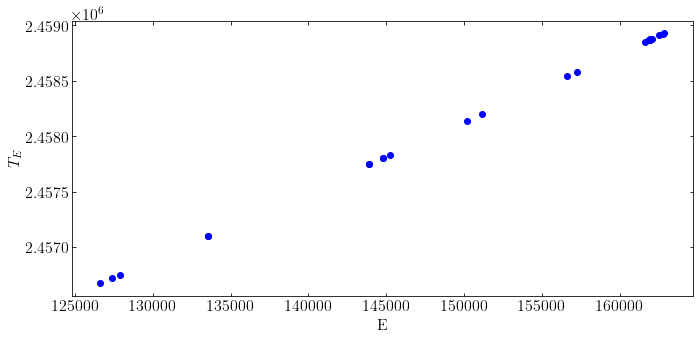

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

25


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)

m = params[0]
c = params[1]

dm = covariance[0,0]
dc = covariance[1,1]


print('Slope (m) is ', m)
print('The error of the slope (dm) is ', dm)
print('Intercept (c) is ', c)
print('The error of the intercept (dc) is ', dc)
print(covariance)

Slope (m) is  0.06236285541534491
The error of the slope (dm) is  4.730670164530509e-19
Intercept (c) is  2448773.213729193
The error of the intercept (dc) is  1.0834377022937018e-08
[[ 4.73067016e-19 -7.13448507e-14]
 [-7.13448507e-14  1.08343770e-08]]


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
y_line = linear_fit(x_line, m, c)

ys = m*x + c #just only our data point
Residual = y - ys
print(y)
print(ys)
print(Residual)

#np.savetxt("Linear_fit_period_year_2017KG5.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
m = 2
dof = len_x - m
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[2456670.34677356 2456717.36835247 2456748.30036724 2457100.33871551
 2457101.14945633 2457748.28884756 2457748.35119104 2457802.23271517
 2457802.41981902 2457829.36056651 2458140.42647328 2458200.23245417
 2458542.41740511 2458580.0845501  2458851.30060629 2458870.25888747
 2458870.38363828 2458871.1943114  2458871.2567542  2458873.31469828
 2458873.4394328  2458880.17462731 2458909.29802913 2458926.13599003
 2458931.12503998]
[2456670.34683615 2456717.36842913 2456748.30040542 2457100.33872424
 2457101.14944136 2457748.288792   2457748.35115486 2457802.23266194
 2457802.4197505  2457829.36050404 2458140.42642685 2458200.2324052
 2458542.41739286 2458580.08455753 2458851.30061573 2458870.25892378
 2458870.38364949 2458871.19436661 2458871.25672947 2458873.3147037
 2458873.43942941 2458880.17461779 2458909.29807127 2458926.13604223
 2458931.12507067]
[-6.25886023e-05 -7.66622834e-05 -3.81781720e-05 -8.72788951e-06
  1.49719417e-05  5.55571169e-05  3.61814164e-05  5.32325357e-05
  6.85

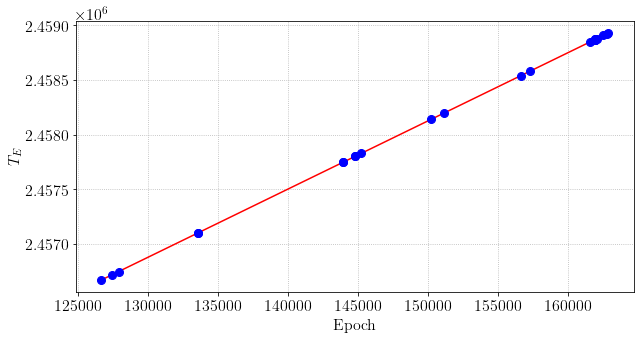

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x, ys, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

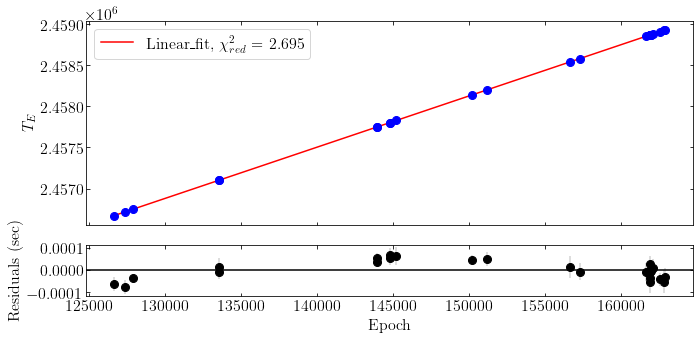

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x, ys, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("2022_Mar_week2_ephemeris_determination_Res.jpg", dpi=1000)

plt.show()